# 5.3 독립변수가 여럿인 모델

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.3.1 분석 준비

In [2]:
sales = pd.read_csv("../../data/5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


5.3.2 데이터로 그래프 그리기

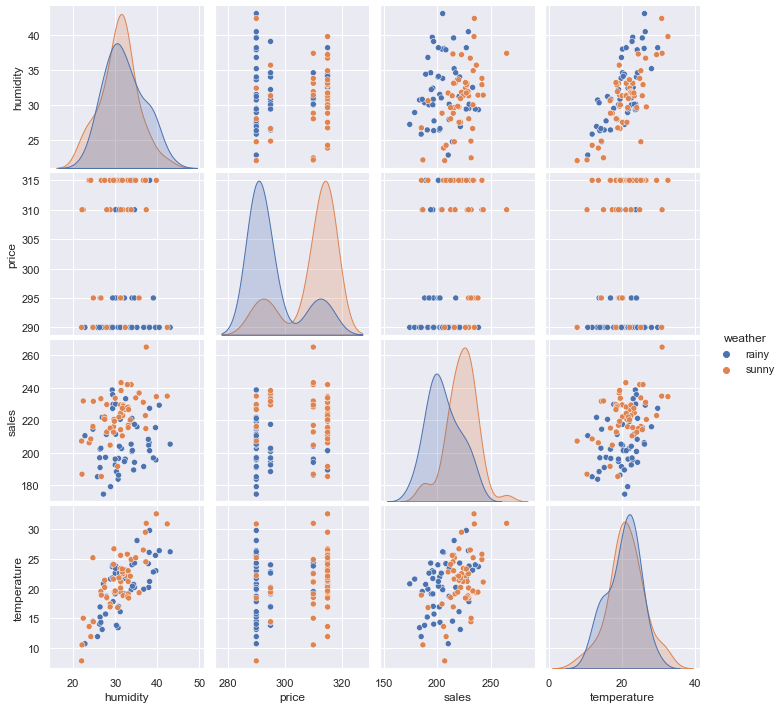

In [3]:
sns.pairplot(data=sales, hue="weather")

5.3.3 나쁜 분석 예: 변수가 1개인 모델 만들기

In [4]:
lm_dame = smf.ols("sales ~ price", sales).fit()
print(lm_dame.params)

Intercept    113.645406
price          0.332812
dtype: float64


In [5]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


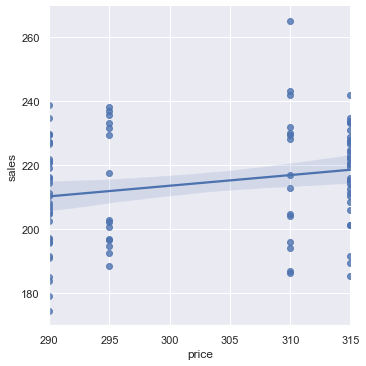

In [6]:
sns.lmplot(x="price", y="sales", data=sales)

5.3.4 독립변수 간의 관계 조사하기

In [7]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


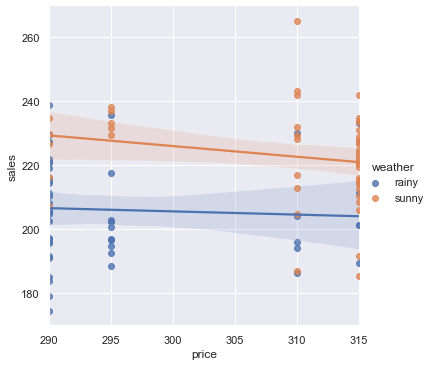

In [8]:
sns.lmplot(x="price", y="sales", data=sales, hue="weather")

5.3.5 복수의 독립변수를 가지는 모델

In [9]:
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
print(lm_sales.params)

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64
